# Coverage/connectivity analysis

## Load graph
Parsing GFA file manually, since GfaPy takes a strangely long amount of time reading through it.

In [2]:
import networkx as nx
import matplotlib
from matplotlib import pyplot
from statistics import median

# Loads the newest graph
FILENAME = "/home/marcus/PevznerLabBigData/20201124_big_graph/20201124_graph_nolen.gfa"

# We ignore directionality for right now
graph = nx.Graph()

with open(FILENAME, "r") as gfafile:
    for line in gfafile:
        if line[0] == "S":
            parts = line.strip().split("\t")
            node_name = parts[1]
            node_len = None
            node_cov = None
            extra_data = parts[3:]
            for tag in extra_data:
                if tag.startswith("LN:i:"):
                    if node_len is None:
                        node_len = int(tag[5:])
                    else:
                        raise ValueError("Duplicate length for node {}".format(node_name))
                elif tag.startswith("dp:i:"):
                    if node_cov is None:
                        node_cov = int(tag[5:])
                    else:
                        raise ValueError("Duplicate coverage for node {}".format(node_name))
            graph.add_node(node_name, length=node_len, cov=node_cov)
        elif line[0] == "L":
            parts = line.strip().split("\t")
            src = parts[1]
            snk = parts[3]
            # Ignore directionality for just right now; this means that some links will be "repeated" (for
            # the new graph this means that the NX representation has 484 less links)
            graph.add_edge(src, snk)

print("Graph contains {} edges (represented as GFA segments).".format(graph.number_of_nodes()))
print("Graph contains {} links between edges (ignoring directionality for now).".format(graph.number_of_edges()))
print("Graph contains {} connected components.".format(nx.number_connected_components(graph)))

Graph contains 91056 edges (represented as GFA segments).
Graph contains 98994 links between edges (ignoring directionality for now).
Graph contains 25861 connected components.


## Compute coverage statstics for each component

In [3]:
# Sort components by number of edges.
node2len = nx.get_node_attributes(graph, "length")
node2cov = nx.get_node_attributes(graph, "cov")
sorted_components = sorted(
    nx.connected_components(graph),
    key=len,
    reverse=True
)

node2cmp = {}
cmp2totalLen = {}
cmp2meanCov = {}
cmp2medianCov = {}
cmp2cov = {}
for i, cmp in enumerate(sorted_components):
    for node in cmp:
        node2cmp[node] = i + 1
    cmp2cov[i] = [node2cov[node] for node in cmp]
    cmp2totalLen[i] = sum([node2len[node] for node in cmp])
    cmp2meanCov[i] = sum(cmp2cov[i]) / len(cmp)
    cmp2medianCov[i] = median(cmp2cov[i])
    # https://stackoverflow.com/a/10742904/10730311
    cmpNum = "{:,}".format(i + 1).ljust(6, " ")
    print("Component #{}: {} edges, total length {:,}, mean coverage {:.2f}x, median coverage {:.2f}x, has edge {}".format(
        # https://stackoverflow.com/a/59841/10730311
        cmpNum, len(cmp), cmp2totalLen[i], cmp2meanCov[i], cmp2medianCov[i], next(iter(cmp))
    ))

Component #1     : 54689 edges, total length 1,854,972,844, mean coverage 1232.33x, median coverage 27.00x, has edge 87503
Component #2     : 1672 edges, total length 5,459,066, mean coverage 120.25x, median coverage 79.00x, has edge 8858
Component #3     : 575 edges, total length 5,970,834, mean coverage 39.02x, median coverage 31.00x, has edge 44407
Component #4     : 347 edges, total length 1,541,295, mean coverage 8445.29x, median coverage 4891.00x, has edge 43195
Component #5     : 224 edges, total length 1,905,535, mean coverage 94.80x, median coverage 80.50x, has edge 90557
Component #6     : 219 edges, total length 5,026,104, mean coverage 17.01x, median coverage 15.00x, has edge 61658
Component #7     : 214 edges, total length 2,102,113, mean coverage 123.91x, median coverage 12.00x, has edge 8937
Component #8     : 208 edges, total length 3,054,790, mean coverage 15.85x, median coverage 14.00x, has edge 40238
Component #9     : 188 edges, total length 1,244,238, mean coverage

Component #2,904 : 1 edges, total length 4,073, mean coverage 9.00x, median coverage 9.00x, has edge 9580
Component #2,905 : 1 edges, total length 1,007, mean coverage 8.00x, median coverage 8.00x, has edge 9590
Component #2,906 : 1 edges, total length 2,121, mean coverage 10.00x, median coverage 10.00x, has edge 9598
Component #2,907 : 1 edges, total length 7,441, mean coverage 8.00x, median coverage 8.00x, has edge 9601
Component #2,908 : 1 edges, total length 24,655, mean coverage 14.00x, median coverage 14.00x, has edge 9626
Component #2,909 : 1 edges, total length 4,676, mean coverage 5.00x, median coverage 5.00x, has edge 9627
Component #2,910 : 1 edges, total length 1,818, mean coverage 11.00x, median coverage 11.00x, has edge 9632
Component #2,911 : 1 edges, total length 2,622, mean coverage 9.00x, median coverage 9.00x, has edge 9633
Component #2,912 : 1 edges, total length 3,969, mean coverage 6.00x, median coverage 6.00x, has edge 9635
Component #2,913 : 1 edges, total lengt

Component #5,662 : 1 edges, total length 2,115, mean coverage 21.00x, median coverage 21.00x, has edge 20377
Component #5,663 : 1 edges, total length 2,370, mean coverage 9.00x, median coverage 9.00x, has edge 20381
Component #5,664 : 1 edges, total length 35,721, mean coverage 6.00x, median coverage 6.00x, has edge 20382
Component #5,665 : 1 edges, total length 15,738, mean coverage 8.00x, median coverage 8.00x, has edge 20384
Component #5,666 : 1 edges, total length 29,317, mean coverage 4.00x, median coverage 4.00x, has edge 20385
Component #5,667 : 1 edges, total length 14,288, mean coverage 6.00x, median coverage 6.00x, has edge 20387
Component #5,668 : 1 edges, total length 24,102, mean coverage 10.00x, median coverage 10.00x, has edge 20388
Component #5,669 : 1 edges, total length 5,208, mean coverage 11.00x, median coverage 11.00x, has edge 20390
Component #5,670 : 1 edges, total length 4,972, mean coverage 55.00x, median coverage 55.00x, has edge 20391
Component #5,671 : 1 edg

Component #8,648 : 1 edges, total length 1,784, mean coverage 6.00x, median coverage 6.00x, has edge 32074
Component #8,649 : 1 edges, total length 3,712, mean coverage 11.00x, median coverage 11.00x, has edge 32078
Component #8,650 : 1 edges, total length 3,229, mean coverage 20.00x, median coverage 20.00x, has edge 32079
Component #8,651 : 1 edges, total length 2,993, mean coverage 7.00x, median coverage 7.00x, has edge 32082
Component #8,652 : 1 edges, total length 6,137, mean coverage 38.00x, median coverage 38.00x, has edge 32087
Component #8,653 : 1 edges, total length 8,234, mean coverage 4.00x, median coverage 4.00x, has edge 32098
Component #8,654 : 1 edges, total length 8,134, mean coverage 5.00x, median coverage 5.00x, has edge 32100
Component #8,655 : 1 edges, total length 8,719, mean coverage 6.00x, median coverage 6.00x, has edge 32112
Component #8,656 : 1 edges, total length 2,701, mean coverage 6.00x, median coverage 6.00x, has edge 32113
Component #8,657 : 1 edges, tot

Component #11,448: 1 edges, total length 30,653, mean coverage 8.00x, median coverage 8.00x, has edge 43069
Component #11,449: 1 edges, total length 18,570, mean coverage 6.00x, median coverage 6.00x, has edge 43070
Component #11,450: 1 edges, total length 43,955, mean coverage 4.00x, median coverage 4.00x, has edge 43073
Component #11,451: 1 edges, total length 28,653, mean coverage 17.00x, median coverage 17.00x, has edge 43081
Component #11,452: 1 edges, total length 6,991, mean coverage 3.00x, median coverage 3.00x, has edge 43094
Component #11,453: 1 edges, total length 11,486, mean coverage 5.00x, median coverage 5.00x, has edge 43117
Component #11,454: 1 edges, total length 32,209, mean coverage 3.00x, median coverage 3.00x, has edge 43118
Component #11,455: 1 edges, total length 1,066, mean coverage 3.00x, median coverage 3.00x, has edge 43128
Component #11,456: 1 edges, total length 524, mean coverage 3.00x, median coverage 3.00x, has edge 43129
Component #11,457: 1 edges, tot

Component #14,612: 1 edges, total length 13,832, mean coverage 3.00x, median coverage 3.00x, has edge 54204
Component #14,613: 1 edges, total length 18,726, mean coverage 3.00x, median coverage 3.00x, has edge 54205
Component #14,614: 1 edges, total length 50,466, mean coverage 3.00x, median coverage 3.00x, has edge 54206
Component #14,615: 1 edges, total length 50,500, mean coverage 4.00x, median coverage 4.00x, has edge 54208
Component #14,616: 1 edges, total length 3,521, mean coverage 3.00x, median coverage 3.00x, has edge 54213
Component #14,617: 1 edges, total length 4,712, mean coverage 5.00x, median coverage 5.00x, has edge 54217
Component #14,618: 1 edges, total length 42,871, mean coverage 3.00x, median coverage 3.00x, has edge 54218
Component #14,619: 1 edges, total length 135,243, mean coverage 3.00x, median coverage 3.00x, has edge 54219
Component #14,620: 1 edges, total length 12,346, mean coverage 4.00x, median coverage 4.00x, has edge 54220
Component #14,621: 1 edges, t

Component #17,448: 1 edges, total length 34,210, mean coverage 4.00x, median coverage 4.00x, has edge 63350
Component #17,449: 1 edges, total length 4,821, mean coverage 4.00x, median coverage 4.00x, has edge 63355
Component #17,450: 1 edges, total length 9,250, mean coverage 7.00x, median coverage 7.00x, has edge 63356
Component #17,451: 1 edges, total length 7,098, mean coverage 5.00x, median coverage 5.00x, has edge 63357
Component #17,452: 1 edges, total length 7,209, mean coverage 3.00x, median coverage 3.00x, has edge 63364
Component #17,453: 1 edges, total length 59,179, mean coverage 6.00x, median coverage 6.00x, has edge 63375
Component #17,454: 1 edges, total length 80,389, mean coverage 3.00x, median coverage 3.00x, has edge 63380
Component #17,455: 1 edges, total length 79,080, mean coverage 3.00x, median coverage 3.00x, has edge 63381
Component #17,456: 1 edges, total length 5,461, mean coverage 4.00x, median coverage 4.00x, has edge 63386
Component #17,457: 1 edges, total

Component #20,166: 1 edges, total length 7,871, mean coverage 18.00x, median coverage 18.00x, has edge 71414
Component #20,167: 1 edges, total length 12,833, mean coverage 3.00x, median coverage 3.00x, has edge 71415
Component #20,168: 1 edges, total length 12,921, mean coverage 4.00x, median coverage 4.00x, has edge 71416
Component #20,169: 1 edges, total length 34,669, mean coverage 4.00x, median coverage 4.00x, has edge 71420
Component #20,170: 1 edges, total length 11,259, mean coverage 3.00x, median coverage 3.00x, has edge 71421
Component #20,171: 1 edges, total length 27,449, mean coverage 11.00x, median coverage 11.00x, has edge 71423
Component #20,172: 1 edges, total length 8,497, mean coverage 3.00x, median coverage 3.00x, has edge 71425
Component #20,173: 1 edges, total length 2,294, mean coverage 11.00x, median coverage 11.00x, has edge 71429
Component #20,174: 1 edges, total length 13,143, mean coverage 95.00x, median coverage 95.00x, has edge 71433
Component #20,175: 1 ed

Component #22,605: 1 edges, total length 12,037, mean coverage 4.00x, median coverage 4.00x, has edge 77177
Component #22,606: 1 edges, total length 83,755, mean coverage 3.00x, median coverage 3.00x, has edge 77181
Component #22,607: 1 edges, total length 43,863, mean coverage 5.00x, median coverage 5.00x, has edge 77182
Component #22,608: 1 edges, total length 13,317, mean coverage 4.00x, median coverage 4.00x, has edge 77183
Component #22,609: 1 edges, total length 42,267, mean coverage 3.00x, median coverage 3.00x, has edge 77188
Component #22,610: 1 edges, total length 76,733, mean coverage 5.00x, median coverage 5.00x, has edge 77189
Component #22,611: 1 edges, total length 22,596, mean coverage 9.00x, median coverage 9.00x, has edge 77190
Component #22,612: 1 edges, total length 39,219, mean coverage 3.00x, median coverage 3.00x, has edge 77191
Component #22,613: 1 edges, total length 38,915, mean coverage 3.00x, median coverage 3.00x, has edge 77192
Component #22,614: 1 edges, 

Component #25,587: 1 edges, total length 106,464, mean coverage 4.00x, median coverage 4.00x, has edge 90326
Component #25,588: 1 edges, total length 69,657, mean coverage 5.00x, median coverage 5.00x, has edge 90328
Component #25,589: 1 edges, total length 37,314, mean coverage 20.00x, median coverage 20.00x, has edge 90329
Component #25,590: 1 edges, total length 10,270, mean coverage 18.00x, median coverage 18.00x, has edge 90333
Component #25,591: 1 edges, total length 29,542, mean coverage 4.00x, median coverage 4.00x, has edge 90334
Component #25,592: 1 edges, total length 56,153, mean coverage 109.00x, median coverage 109.00x, has edge 90335
Component #25,593: 1 edges, total length 96,088, mean coverage 3.00x, median coverage 3.00x, has edge 90337
Component #25,594: 1 edges, total length 32,396, mean coverage 578.00x, median coverage 578.00x, has edge 90338
Component #25,595: 1 edges, total length 155,232, mean coverage 3.00x, median coverage 3.00x, has edge 90349
Component #25,

## Compute entire-graph coverage statistics

In [21]:
covs = node2cov.values()
print("Minimum coverage: {}".format(min(covs)))
print("Maximum coverage: {}\n".format(max(covs)))
print("Average coverage: {:.2f}".format(sum(covs) / len(covs)))
print("Median coverage: {}\n".format(median(covs)))
    
num_nodes_w_1mil_cov = 0
for n in node2cov.keys():
    if node2cov[n] >= 1000000:
        num_nodes_w_1mil_cov += 1
        print(n, node2cov[n], node2cmp[n])
print("Number of edges with coverage >= 1 million: {}\n".format(num_nodes_w_1mil_cov))

print("===MAX COVERAGE EDGES===")
max_cov_nodes = sorted(node2cov.keys(), key=lambda node: node2cov[node], reverse=True)
for i in range(10):
    node = max_cov_nodes[i]
    print(
        "{}. Edge {} has a coverage of {:,}. {} neighbors. In cmp {}. Length {:,}.".format(
            i + 1, node, node2cov[node], len(graph.adj[node]), node2cmp[node], node2len[node]
        )
    )
    
# (Allowing self edges, tho)
print("\n===MAX COVERAGE EDGES (just isolated ones)===")
max_cov_isolated_nodes = list(
    filter(
        lambda node: len(set(graph.adj[node]) - set([node])) == 0,
        max_cov_nodes
    )
)
for i in range(10):
    node = max_cov_isolated_nodes[i]
    print(
        "{}. Edge {} has a coverage of {}. In cmp {}. Length {:,}.".format(
            i + 1, node, node2cov[node], node2cmp[node], node2len[node]
        )
    )

Minimum coverage: 0
Maximum coverage: 7527738

Average coverage: 859.07
Median coverage: 16.0

215 1122371 1
4508 7527738 1
4510 5507106 1
4519 3999119 1
4523 2508226 1
4525 2737491 1
6621 2110019 1
8574 1295239 105
10265 2068430 1
10535 1841593 1
Number of edges with coverage >= 1 million: 10

===MAX COVERAGE EDGES===
1. Edge 4508 has a coverage of 7,527,738. 19 neighbors. In cmp 1. Length 580.
2. Edge 4510 has a coverage of 5,507,106. 12 neighbors. In cmp 1. Length 611.
3. Edge 4519 has a coverage of 3,999,119. 9 neighbors. In cmp 1. Length 541.
4. Edge 4525 has a coverage of 2,737,491. 12 neighbors. In cmp 1. Length 532.
5. Edge 4523 has a coverage of 2,508,226. 12 neighbors. In cmp 1. Length 568.
6. Edge 6621 has a coverage of 2,110,019. 14 neighbors. In cmp 1. Length 575.
7. Edge 10265 has a coverage of 2,068,430. 7 neighbors. In cmp 1. Length 602.
8. Edge 10535 has a coverage of 1,841,593. 19 neighbors. In cmp 1. Length 544.
9. Edge 8574 has a coverage of 1,295,239. 8 neighbors. 

## Find long (>= 1 million bp) and high-coverage (> 500x) edges in simple areas of the graph

(Good candidates for constructing mutation spectra.)

In [37]:
good_nodes = filter(lambda node: node2len[node] >= 100000, max_cov_nodes)
good_nodes = filter(lambda node: node2cov[node] >= 100, good_nodes)
good_nodes = filter(lambda node: node2cmp[node] != 1, good_nodes)
for i, node in enumerate(good_nodes):
    if node2cov[node] >= 100:
        cmp = node2cmp[node]
        neighbors = set(graph.adj[node]) - set([node])
        print(
            "{}. Edge {} has a coverage of {:,} and length of {:,}. {} neighbors, ignoring self-edges. In component {}.".format(
                i + 1, node, node2cov[node], node2len[node], len(neighbors), cmp
            )
        )
    else:
        break

1. Edge 74568 has a coverage of 4,160 and length of 137,116. 4 neighbors, ignoring self-edges. In component 4.
2. Edge 6767 has a coverage of 3,849 and length of 638,001. 3 neighbors, ignoring self-edges. In component 4.
3. Edge 41770 has a coverage of 2,499 and length of 392,154. 0 neighbors, ignoring self-edges. In component 11111.
4. Edge 87750 has a coverage of 2,076 and length of 132,298. 0 neighbors, ignoring self-edges. In component 25149.
5. Edge 87954 has a coverage of 1,375 and length of 201,676. 0 neighbors, ignoring self-edges. In component 25184.
6. Edge 73079 has a coverage of 1,372 and length of 324,867. 5 neighbors, ignoring self-edges. In component 162.
7. Edge 17232 has a coverage of 1,300 and length of 1,169,066. 3 neighbors, ignoring self-edges. In component 162.
8. Edge 17416 has a coverage of 1,289 and length of 949,144. 5 neighbors, ignoring self-edges. In component 162.
9. Edge 79958 has a coverage of 1,065 and length of 186,387. 0 neighbors, ignoring self-edges

## Visualize histogram of average coverage by component

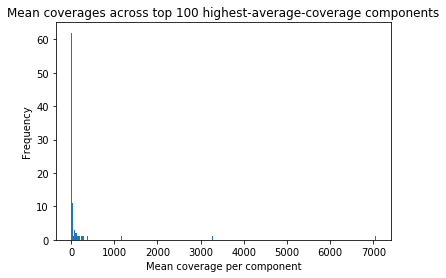

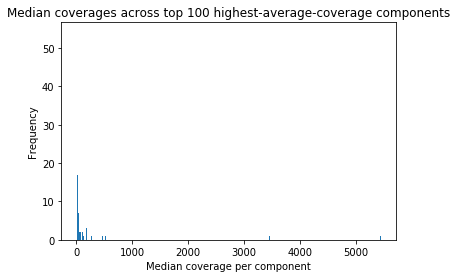

In [6]:
%matplotlib inline

pyplot.hist(x=[cmp2meanCov[c] for c in range(100)], bins="auto")
pyplot.xlabel("Mean coverage per component")
pyplot.ylabel("Frequency")
pyplot.title("Mean coverages across top 100 highest-average-coverage components")
pyplot.show()

pyplot.hist(x=[cmp2medianCov[c] for c in range(100)], bins="auto")
pyplot.xlabel("Median coverage per component")
pyplot.ylabel("Frequency")
pyplot.title("Median coverages across top 100 highest-average-coverage components")
pyplot.show()

## Visualize coverage histograms for the top $N$ components by mean coverage
Adapted from [this article](https://realpython.com/python-histograms/#visualizing-histograms-with-matplotlib-and-pandas).

KeyboardInterrupt: 

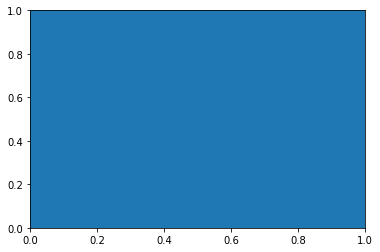

In [7]:
%matplotlib inline
import math

N = 72

for i in range(N):
    noun = "edge" if len(cmp2cov[i]) == 1 else "edges"
    title = "Coverages: Component #{}\n{:,} {}; total length {:,}; mean coverage {:.2f}x".format(
        i + 1, len(cmp2cov[i]), noun, cmp2totalLen[i], cmp2meanCov[i]
    )
    pyplot.hist(x=cmp2cov[i], bins="auto")
        
    pyplot.xlabel("Coverage")
    pyplot.ylabel("Frequency")
    pyplot.title(title)
    pyplot.show()

## How many of the top $N$ components contain just 1 edge?

In [ ]:
num_1_edge_cmps = 0
for i in range(N):
    if len(cmp2cov[i]) == 1:
        num_1_edge_cmps += 1
print("{} of the top {} components have just 1 edge.".format(num_1_edge_cmps, N))

## For all components, plot number of edges vs. mean coverage

In [ ]:
for cutoffs in [ [float("inf"), float("inf")], [1000, 10000], [50, 2000] ]:
    num_edges = []
    mean_cov = []
    for i, cmp in enumerate(sorted_components):
        ne = len(cmp)
        mc = cmp2meanCov[i]
        if ne < cutoffs[0] and mc < cutoffs[1]:
            num_edges.append(ne)
            mean_cov.append(mc)

    pyplot.scatter(x=num_edges, y=mean_cov)
    pyplot.title("Components: Number of edges vs. average coverage")
    pyplot.xlabel("Number of edges")
    pyplot.ylabel("Average coverage")
    pyplot.show()

## Prove that for every edge E in the graph, E and -E are not in the same weakly connected component

In [ ]:
FILENAME = "/home/marcus/PevznerLabBigData/20201014_graph/noseq.gfa"

# We ignore directionality for right now
graph = nx.DiGraph()

def invert_orient(orient):
    if orient == "+":
        return "-"
    elif orient == "-":
        return "+"
    else:
        raise ValueError("Invalid orienatation {}".format(orient))

# !!! Load graph in "double" mode, i.e. treating each edge's + and - as two objects. !!!
        
with open(FILENAME, "r") as gfafile:
    for line in gfafile:
        if line[0] == "S":
            parts = line.strip().split("\t")
            node_name = parts[1]
            node_len = None
            node_cov = None
            extra_data = parts[3:]
            for tag in extra_data:
                if tag.startswith("LN:i:"):
                    if node_len is None:
                        node_len = int(tag[5:])
                    else:
                        raise ValueError("Duplicate length for node {}".format(node_name))
                elif tag.startswith("dp:i:"):
                    if node_cov is None:
                        node_cov = int(tag[5:])
                    else:
                        raise ValueError("Duplicate coverage for node {}".format(node_name))
            graph.add_node(node_name + "+", length=node_len, cov=node_cov)
            graph.add_node(node_name + "-", length=node_len, cov=node_cov)
        elif line[0] == "L":
            parts = line.strip().split("\t")
            src = parts[1]
            src_orient = parts[2]
            snk = parts[3]
            snk_orient = parts[2]
            
            graph.add_edge(src + src_orient, snk + snk_orient)
            graph.add_edge(snk + invert_orient(snk_orient), src + invert_orient(src_orient))

In [ ]:
sorted_components = sorted(
    nx.weakly_connected_components(graph),
    key=len,
    reverse=True
)
for cmp in sorted_components:
    for node in cmp:
        rc = node[:-1] + invert_orient(node[-1])
        if rc in cmp:
            print(node, rc, "in same weakly connected component!")